# Exp 9
Develop neural network-based time series forecasting model.

In [ ]:
pip install yfinance numpy pandas matplotlib scikit-learn tensorflow


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


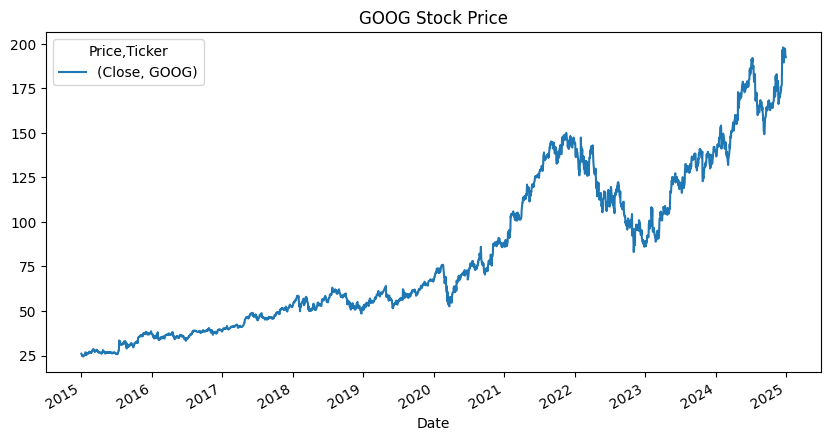

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Download Google stock data
df = yf.download('GOOG', start='2015-01-01', end='2024-12-31')
df = df[['Close']]
df.dropna(inplace=True)

# Visualize
df.plot(title='GOOGLE Stock Price', figsize=(10, 5))
plt.show()


In [ ]:
# Normalize data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

# Create sequences
def create_sequences(data, seq_length):
    x, y = [], []
    for i in range(len(data) - seq_length):
        x.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(x), np.array(y)

SEQ_LEN = 60  # Last 60 days to predict the next day
X, y = create_sequences(scaled_data, SEQ_LEN)

# Train/Test split
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [ ]:
model = Sequential([
    LSTM(64, return_sequences=False, input_shape=(SEQ_LEN, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


62/62 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - loss: 0.0229 - val_loss: 0.0020
Epoch 2/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - loss: 3.2525e-04 - val_loss: 8.2448e-04
Epoch 3/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 2.3227e-04 - val_loss: 7.7966e-04
Epoch 4/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 2.2409e-04 - val_loss: 9.9866e-04
Epoch 5/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 1.9541e-04 - val_loss: 9.6913e-04
Epoch 6/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.2380e-04 - val_loss: 7.2052e-04
Epoch 7/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.1661e-04 - val_loss: 7.7353e-04
Epoch 8/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 1.9122e-04 - val_loss: 6.7145e-04
Epoch 9/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 1.9050e-04 - val_loss: 7.0532e-04
Epoch 10/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 1.9096e-04 - val_loss: 7.1480e-04


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


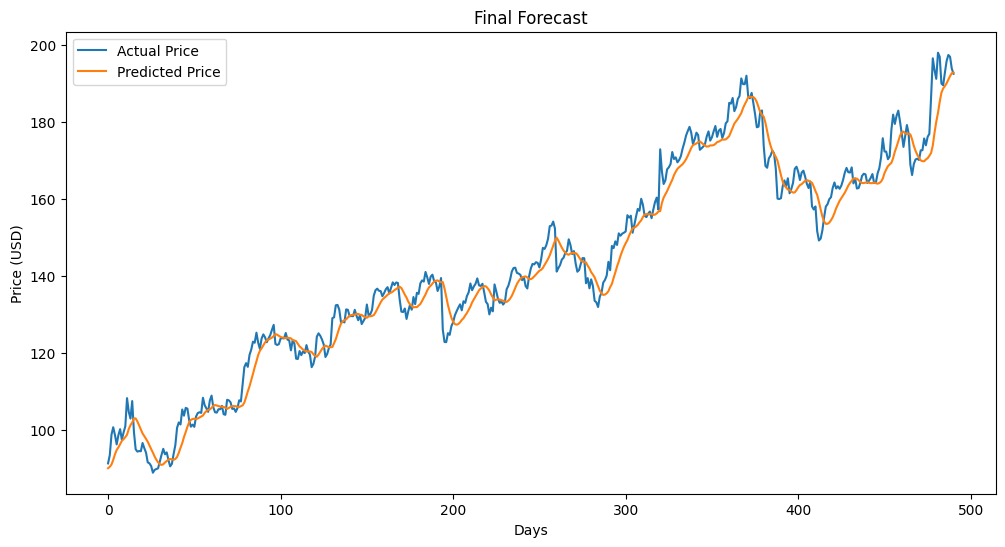

In [ ]:
# Predict
predicted = model.predict(X_test)
predicted = scaler.inverse_transform(predicted)
actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot
plt.figure(figsize=(12, 6))
plt.plot(actual, label='Actual Price')
plt.plot(predicted, label='Predicted Price')
plt.legend()
plt.title('Final Forecast')
plt.xlabel('Days')
plt.ylabel('Price (USD)')
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

rmse = math.sqrt(mean_squared_error(actual, predicted))
mae = mean_absolute_error(actual, predicted)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")


RMSE: 4.64
MAE: 3.56


Optimized


In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [ ]:
# 1. Download data
df = yf.download('GOOG', start='2015-01-01', end='2024-12-31')[['Close']]
df.dropna(inplace=True)

[*********************100%***********************]  1 of 1 completed


In [ ]:
# 3.Differencing to remove trend (stationary series)
df['Close_diff'] = df['Close'].diff()
df.dropna(inplace=True)

In [ ]:
# 4. Scale the differenced log-close data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['Close_diff']])

In [ ]:
# 5. Create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

SEQ_LEN = 60
X, y = create_sequences(scaled_data, SEQ_LEN)

In [ ]:
# Reshape to (samples, time steps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))


In [ ]:
# 6. Train/test split
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [ ]:
# 7. Improved model: LSTM with Dropout
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(SEQ_LEN, 1)),
    Dropout(0.2),
    LSTM(32),
    Dropout(0.2),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


62/62 ━━━━━━━━━━━━━━━━━━━━ 8s 70ms/step - loss: 0.0250 - val_loss: 0.0086
Epoch 2/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 0.0052 - val_loss: 0.0084
Epoch 3/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - loss: 0.0049 - val_loss: 0.0084
Epoch 4/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 71ms/step - loss: 0.0045 - val_loss: 0.0084
Epoch 5/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - loss: 0.0046 - val_loss: 0.0083
Epoch 6/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0043 - val_loss: 0.0083
Epoch 7/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 10s 126ms/step - loss: 0.0043 - val_loss: 0.0086
Epoch 8/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 7s 79ms/step - loss: 0.0041 - val_loss: 0.0085
Epoch 9/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - loss: 0.0043 - val_loss: 0.0082
Epoch 10/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - loss: 0.0038 - val_loss: 0.0083
Epoch 11/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step - loss: 0.0039 - val_loss: 0.0082
Epoch 12/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 9s 71ms/step - loss: 0.0041 - va

In [ ]:
# Ensure that predicted_diff has the same number of features as the scaler's expectation
predicted_diff = predicted_diff.reshape(-1, 5)  # Assuming the model uses 5 features

# Then apply inverse_transform
predicted_diff = scaler.inverse_transform(predicted_diff)
actual_diff = scaler.inverse_transform(y_test.reshape(-1, 5))  # Ensure y_test matches the shape


ValueError: cannot reshape array of size 491 into shape (5)

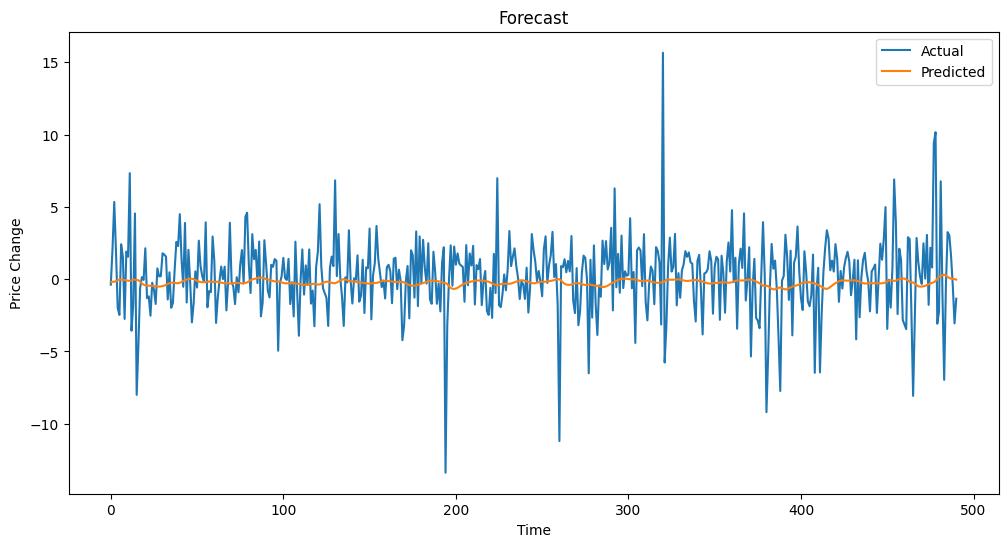

In [ ]:
# 9. Reconstruct actual prices from differenced predictions
# Start from the last value of original close before test set
last_close_price = df['Close'].iloc[split + SEQ_LEN - 1]

# Reconstruct prices from differences
predicted_prices = [last_close_price]
for diff in predicted_diff:
    predicted_prices.append(predicted_prices[-1] + diff[0])
predicted_prices = predicted_prices[1:]  # remove initial dummy

# Reconstruct actual prices
actual_prices = [last_close_price]
for diff in actual_diff:
    actual_prices.append(actual_prices[-1] + diff[0])
actual_prices = actual_prices[1:]


In [ ]:
# 10. Plotting
plt.figure(figsize=(12, 6))
plt.plot(actual_prices, label='Actual Closing Prices', color='blue')
plt.plot(predicted_prices, label='Predicted Closing Prices', color='red', linestyle='--')
plt.title('Google Stock: Actual vs Forecasted Closing Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


In [ ]:
# 11. Evaluation
rmse = math.sqrt(mean_squared_error(actual_prices, predicted_prices))
mae = mean_absolute_error(actual_prices, predicted_prices)
print(f"Optimized RMSE: {rmse:.4f}")
print(f"Optimized MAE : {mae:.4f}")


Optimized RMSE: 2.6519
Optimized MAE : 1.9425
